Tutorial 2: *Lukas Welel*

There are some variable names being reused like PSF, Edet etc. (not at all because I am lazy and copy-paste) so if you re-run an earlier part of the script then it might produce funky outputs. Just re-run the whole thing in order to fix that. 

***
# HCI Week 2 - Fourier Transform Optics
*Matthew Kenworthy // Leiden Observatory*
***
Last week you were able to analyse the disk around Beta Pictoris by masking the data using unsharp masking, subtracting off the averages of annular regions surrounding the central star from the original image and using a reference star. In this tutorial we will go a step back to some of the mathematics behind the basic principles of HCI. We will: 

* Simulate the Point Spread Function (PSF) of the telescope by using Fourier optics
* Look at the relationship between energy and incoming intensity
* Adding a tilt in the phase across the telescope pupil

Good luck and remember: have fun. 

<div class="alert alert-block alert-info">
<b>Tip:</b> your collegues and Google are your best friends. Please ask each other for help during and after the tutorial (a reminder - helping is not copying!)</div>


Load Python modules into the notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.origin'] = 'lower'


Load in some functions we will use later: `displC`, `padcplx` and `FFT`.

In [2]:
def zoom(im,x,y,bb):
    '''zoom(im,x,y,bb) - returns a square 2D image cut out from im centered on location (x,y) 
               and with half-width bb'''
    return(im[y-bb:y+bb,x-bb:x+bb])

def displC(c, title="Amplitude-Phase space of the PSF", trim=101, show=True):
    """displC(c,trim=0) - display a Complex number c as four plots
    
               The top two plots are (Real, Imaginary) quantities
               The bottom two plots are (Amplitude, Phase)
               
               Optionally cut out the central square  with a size of 'trim x trim' pixels"""   
    c2 = np.copy(c)
    if (trim>0): # if the user specifies a trim value, cut out the centre of the image
        (nx,ny) = c.shape
        dx = int((nx-trim) / 2 + 1)
        dy = int((nx-trim) / 2 + 1)
        c2 = c[dx:dx+trim,dy:dy+trim]
        
    # set up the plot panels
    #     fig=plt.figure(figsize=(12,12),
    #                   sharex=True, sharey=True) 
    # who does this like that????

    fig, ((axre, axim), (axamp, axpha)) = plt.subplots(nrows=2, ncols=2,
                         constrained_layout=True,
                         sharex=True,
                         sharey=True,
                         figsize=(12, 12))
    
    # plot out the panels
    im = axre.imshow(c2.real)
    plt.colorbar(im, ax=axre, fraction=0.046, pad=0.04, label="")
    im = axim.imshow(c2.imag)
    plt.colorbar(im, ax=axim, fraction=0.046, pad=0.04, label="")
    im = axamp.imshow(np.abs(c2))
    plt.colorbar(im, ax=axamp, fraction=0.046, pad=0.04, label="")
    im = axpha.imshow(np.angle(c2))
    plt.colorbar(im, ax=axpha, fraction=0.046, pad=0.04, label="")
    

    axre.set_title('Real')
    axre.set_ylabel('y [px]')
    axim.set_title('Imag')
    axamp.set_title('Amplitude')
    axamp.set_xlabel('x [px]')
    axamp.set_ylabel('y [px]')
    axpha.set_title('Phase')
    axpha.set_xlabel('x [px]')
    plt.suptitle(title, fontsize=18)
    if show:
        plt.show()

def padcplx(c,pad=5):
    """padcplx(c,pad=5) - puts a `Complex` array into the centre of a zero-filled `Complex` array
               pad is an integer defining the padding multiplier for the output array """
    (nx, ny) = c.shape
    bignx = nx*pad + 1
    bigny = ny*pad + 1
    big_c = np.zeros((bignx,bigny),dtype=complex)

    dx = int((nx * (pad-1)) / 2 + 1)
    dy = int((ny * (pad-1)) / 2 + 1)

    big_c[dx:dx+nx,dy:dy+ny] = c
    return(big_c)

def FFT(c,pad=5):
    """FFT(c,pad=5) - carry out a complex Fourier transform (with optional padding)
            c - the input 2D Complex numpy array
            pad - integer multiplier for the padding/sampling
               Returns the `Complex` FFT padded array"""
    from numpy.fft import fft2,fftshift,ifft2,ifftshift
    psfA = ifftshift(fft2(fftshift(padcplx(c,pad))))
    return psfA


<span style="  font-size:2em; color: Red;">Useful `NumPy` commands for padding arrays:</span> 
## 1. numpy.pad

The functions include documentation that is presented between two sets of triple quotes ("""). Let us see what these functions are doing:

In [3]:
print(displC.__doc__)
print(padcplx.__doc__)
print(FFT.__doc__)

displC(c,trim=0) - display a Complex number c as four plots
    
               The top two plots are (Real, Imaginary) quantities
               The bottom two plots are (Amplitude, Phase)
               
               Optionally cut out the central square  with a size of 'trim x trim' pixels
padcplx(c,pad=5) - puts a `Complex` array into the centre of a zero-filled `Complex` array
               pad is an integer defining the padding multiplier for the output array 
FFT(c,pad=5) - carry out a complex Fourier transform (with optional padding)
            c - the input 2D Complex numpy array
            pad - integer multiplier for the padding/sampling
               Returns the `Complex` FFT padded array


## Useful `NumPy` commands 

One extremely useful numpy function is `mgrid(X,Y)`. It produces two separate numpy arrays in a list, the first array with X values and a second array with Y values. These can be used as X and Y coordinates in evaluating a function across an image. Read the `NumPy` documentation for details, or use the online help. `imshow()` and `plot()` can display the values of the coordinates.


<div class="alert alert-block alert-success">
<b>Example 2.1:</b> lets create an image! Our image will be a simple meshgrid, made using <code>np.mgrid</code> containing the number range of $0-11$. We can show our image by plotting the X and Y grid obtained with <code>np.mgrid()</code>.
</div>

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]]


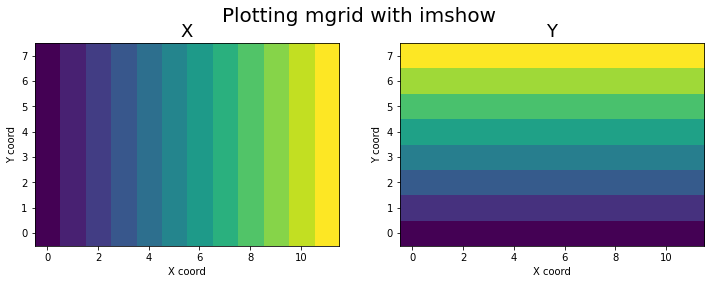

In [4]:
Y,X = np.mgrid[0:8,0:12]
print(X)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))    

ax1.set_xlabel('X coord');  ax1.set_ylabel('Y coord')                    
ax2.set_xlabel('X coord');  ax2.set_ylabel('Y coord')                    

fig.suptitle('Plotting mgrid with imshow', fontsize=20)
ax1.set_title('X', fontsize=18);  ax2.set_title('Y', fontsize=18)                    

image = ax1.imshow(X)    ;   image2 = ax2.imshow(Y)

plt.show()

**IMPORTANT!** Most scientists expect to find the origin of any plot to be in the lower left corner. With `numpy` and `matplotlib` the default position is in the UPPER LEFT corner.

At the top of this Notebook, we told `matplotlib` to put the origin in the LOWER LEFT corner with the command `mpl.rcParams['image.origin'] = 'lower'`.

**PRINTING A NUMPY ARRAY WILL STILL HAVE THE ORIGIN IN THE UPPER LEFT CORNER!! WATCH OUT FOR THIS!!**


## Creating Masks and Shapes arrays


What can you do with these arrays? By implementing masks you can evaluate functions using just one simple step without any `for` loops; like more traditional computer languages. These functions can then act as shapes with which allows masking of arrays that allow the creation of telescope pupils, later on in the workbook.


<div class="alert alert-block alert-success">
<b>Example 2.2:</b> You can calculate the value of the function $x+2y$ for all pixels in an image:
</div>

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 2  3  4  5  6  7  8  9 10 11 12 13]
 [ 4  5  6  7  8  9 10 11 12 13 14 15]
 [ 6  7  8  9 10 11 12 13 14 15 16 17]
 [ 8  9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20 21]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [14 15 16 17 18 19 20 21 22 23 24 25]]


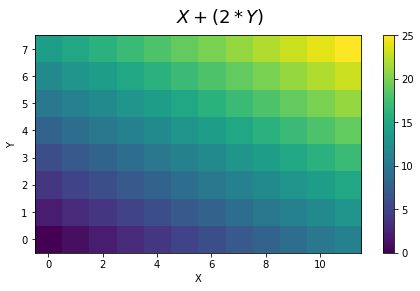

In [5]:
equation = X+2*Y
print (equation)

fig, ax = plt.subplots(1, figsize=(8,4))    

ax.set_xlabel("X")                    
ax.set_ylabel("Y")                    
fig.suptitle("$X + (2*Y)$", fontsize=18) 

image = ax.imshow(equation)
plt.colorbar(image, ax=ax)

plt.show()

**NOTE HOW THE `print(equation)` has small values in the uppper left corner, but the `ax.imshow()` has it in the LOWER LEFT corner!**


<div class="alert alert-block alert-success">
<b>Example 2.2 (continued):</b> We can now make a mask showing where all the points satisfy the equation $x+2y<8$
</div>



[[ True  True  True  True  True  True  True  True False False False False]
 [ True  True  True  True  True  True False False False False False False]
 [ True  True  True  True False False False False False False False False]
 [ True  True False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]]


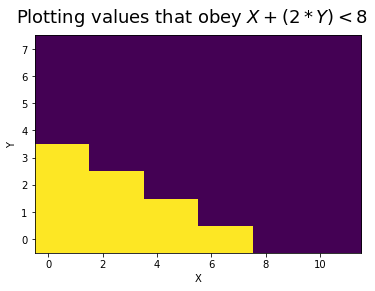

In [6]:
inequality = (X + (2*Y) < 8)
print(inequality)

fig, ax = plt.subplots(1, figsize=(6,4))    

ax.set_xlabel("X")                    
ax.set_ylabel("Y")                    
fig.suptitle("Plotting values that obey $X + (2*Y) < 8$", fontsize=18) 

image = ax.imshow(inequality)
plt.show()

The `inequality` array contains `True` and `False` boolean values which appear as yellow and purple blocks in `imshow`.

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.1</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

The formula for a circle having its centre located at a particular position $(x_c,y_c)$ and radius $r$ is given by the equation:

$$(x-x_c)^2 + (y-y_c)^2 < r^2$$ 

For example, the equation of the points within a circle centered at the origin $(0,0)$ with a radius of 6 results in: $x^2 + y^2 < 6^2.$

**Display the equation $x^2 + y^2 < 7.5^2$ for $x=X$ and $y=Y$, where X and Y are the arrays as defined in the cells above.** 

Hint: You can do this with one line of code.

---

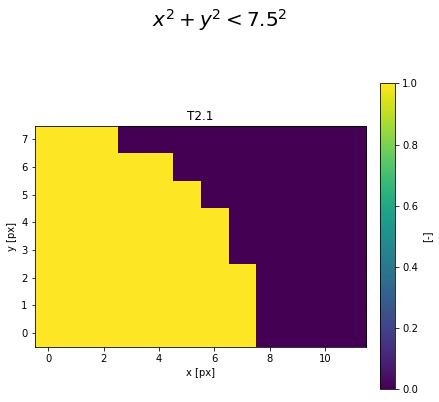

In [7]:
# Q1 answer here
fig, ax = plt.subplots(nrows=1, ncols=1,
                       constrained_layout=True, subplot_kw={'aspect': 1},
                       # sharex=True, sharey=True,
                       figsize=(6, 6))

arr = np.square(X) + np.square(Y) < 7.5**2
im = ax.imshow(arr, cmap='viridis')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="[-]")
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(r'T2.1') 
fig.suptitle(r'$x^{2}+y^{2} < 7.5^{2}$', fontsize=20)
plt.show()  

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.2</span> <span style="  font-size:1em; color: SteelBlue;">
(4 points): </span>



**Write your own function `circle_mask()` that takes a 2D array `im`, the circle center coordinates $x_c, y_c$ and a radius $rc$ as input parameters.**

It should return a mask array with the same shape as the input 2D array `im` that evaluates the equation $(x-x_c)^2 + (y-y_c)^2 < r^2$. Show that your function works by putting a circle of radius 7.6 which is centred at (10.3, 5.2) in an array of 35 by 25 pixels. Plot the results using `imshow()`.

---

**NOTE:** the output image should **NOT** overwrite the input image! You almost never want to overwrite your input image.

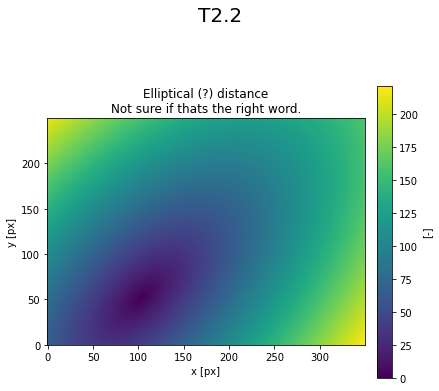

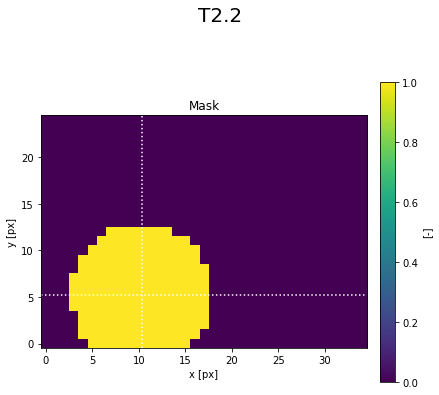

In [8]:
# Q2 answer here
xc, yc = 10.3, 5.2
rcirc = 7.6

def ellipse_distance(im, xc, yc, a=1, b=1, rot=0, **kwargs): # its actually a elliptical mask but what can one do...
    '''
    construct float arr over some (gridded) array where the elements are the distances from some center xc, yc
    :param xc: (float) center of ellipse, x direction
    :param yc: (float) center of ellipse, y direction
    :param a: (float) length of semi-major axis
    :param b: (float) length of semi-minor axis
    :param rot: (float) rotation angle of the ellipse, pass in *DEG*, positive counter clock wise
    :return: (np.array) masked array over x,y with arr<1 inside ellipse
    '''
    y, x = np.mgrid[0:im.shape[0],0:im.shape[1]]
    rot = np.deg2rad(rot)
    rad2 = (((x - xc) * np.cos(rot) + (y - yc) * np.sin(rot)) / a) ** 2 + (
            ((x - xc) * np.sin(rot) - (y - yc) * np.cos(rot)) / b) ** 2
    
    return np.sqrt(rad2)

# test for my elliptical distance
fig, ax = plt.subplots(nrows=1, ncols=1,
                       constrained_layout=True, subplot_kw={'aspect': 1},
                       # sharex=True, sharey=True,
                       figsize=(6, 6))

arr = np.ones((250, 350))
arr = ellipse_distance(arr, xc*10, yc*10, a=2, b=1, rot=45)
img = ax.imshow(arr, cmap='viridis')
plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04, label="[-]")
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(f'Elliptical (?) distance\nNot sure if thats the right word.') 
fig.suptitle(r'T2.2', fontsize=20)
plt.show()  


def circle_mask(im, xc, yc, rcirc, a=1, b=1, rot=0, **kwargs): # its actually a elliptical mask but what can one do...
    '''
    construct elliptical or circular mask over some array centered at xc, yc wit r rcirc (might be scaled for ellipses) 
    :param xc: (float) center of ellipse, x direction
    :param yc: (float) center of ellipse, y direction
    :param a: (float) length of semi-major axis
    :param b: (float) length of semi-minor axis
    :param rot: (float) rotation angle of the ellipse, pass in *DEG*, positive counter clock wise
    :return: (np.array) array  with arr=1 inside ellipse
    '''
    r = ellipse_distance(im, xc, yc, a, b, rot, **kwargs)
    r = (r < rcirc).astype(bool)
    return r

fig, ax = plt.subplots(nrows=1, ncols=1,
                       constrained_layout=True, subplot_kw={'aspect': 1},
                       # sharex=True, sharey=True,
                       figsize=(6, 6))

arr = np.ones((25, 35))
arr = circle_mask(arr, xc, yc, rcirc)
img = ax.imshow(arr, cmap='viridis')
plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04, label="[-]")

ax.axhline(yc,color="w", ls="dotted")
ax.axvline(xc,color="w", ls="dotted")

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(r'Mask') 
fig.suptitle(r'T2.2', fontsize=20)
plt.show() 

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.3</span> <span style="  font-size:1em; color: SteelBlue;">
(5 points): </span>

**Use your `circle_mask()` routine to mask the central 22 pixels in the Beta Pictoris coronagraphic image from last week's practicum**

<div class="alert alert-block alert-info">
<b>Steps:</b> 
<ol> <li> Read in the Beta Pictoris image and cut out an image 50x50 pixels centered on the star's image</li>
    <li> Use your routine to create a circular mask and apply it to the Beta Pictoris as an input</li>
    <li> Displaying the image with the applied circle mask as a (i) mask and (ii) filter by using <code>imshow()</code> twice.</li>
</ol>
</div>

<div class="alert alert-block alert-info">
<b>Hint:</b> Look at your answer of Question 1.3 of the last tutorial. You can make use of the <code>zoom()</code> function. </div>

---

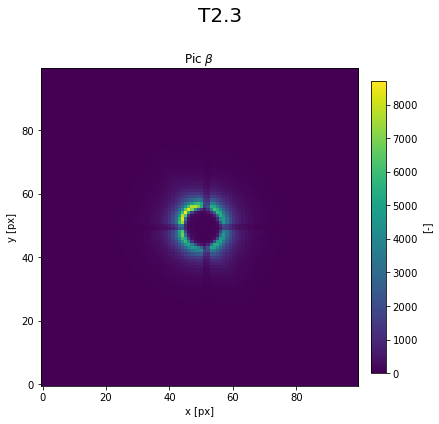

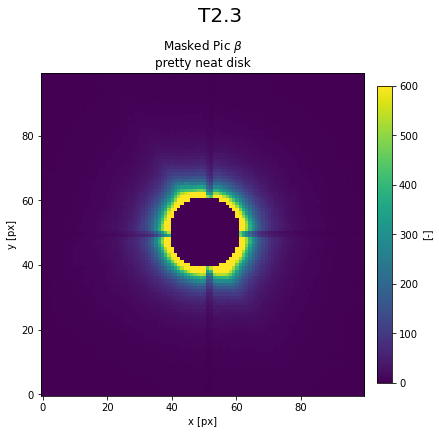

In [9]:
from astropy.io import fits
from astropy.convolution import convolve

# Q3 answer here

# loading in the images into the Notebook.
pic1, pic1_header = fits.getdata("../week_1/beta_pic_kalas_1995/pic1.fits", header=True)
xcen = 262 - 1;   ycen = 198 - 1

mask = circle_mask(pic1, xcen, ycen, 11) # oh my god, why use capitalized variables if they are not classes? o

fig, ax = plt.subplots(nrows=1, ncols=1,
                       constrained_layout=True, subplot_kw={'aspect': 1},
                       # sharex=True, sharey=True,
                       figsize=(6, 6))

img = ax.imshow(zoom(pic1, xcen, ycen, 50),
                vmin=None, vmax=None,
                cmap='viridis')
plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04, label="[-]")
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(r'Pic $\beta$') 
fig.suptitle(r'T2.3', fontsize=20)
plt.show() 

fig, ax = plt.subplots(nrows=1, ncols=1,
                       constrained_layout=True, subplot_kw={'aspect': 1},
                       # sharex=True, sharey=True,
                       figsize=(6, 6))

img = ax.imshow(zoom(pic1 * np.logical_not(mask), xcen, ycen, 50),
                vmin=None, vmax=600,
                cmap='viridis')
plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04, label="[-]")
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(r'Masked Pic $\beta$'+f'\npretty neat disk') 
fig.suptitle(r'T2.3', fontsize=20)
plt.show() 

In these exercises you learned how to work with masks, shapes and how to use them to apply them as a mask or filter to an observation. In the next exercises we will turn towards the physics behind lenses and how to use Fourier Optics to simulate Point Spread Functions (PSFs).

## Simulating PSFs with Fourier Optics


A simple imaging lens forms an image of the sky on a detector.

The lens converts incoming wavefronts of light into angular positions that are recorded on a detector.

In the Fraunhofer limit, the wavefront incident on the lens can be described by the electric field $\mathbf{E}$. This electric field can be represented by a complex number

$$\mathbf{E} = E\cdot e^{(i\phi)},$$ 

where $E$ and $\phi$is are real numbers, and $\mathbf{E}$ is a complex number containing both the electric field amplitude and phase.

The resultant electric field at the detector is given by the Fourier transform of $E_{det}=\mathcal{F}(\mathbf{E})$, where $\mathcal{F}$ is the Fourier transform operator.

<div class="alert alert-block alert-info">
<b>Tip:</b> The <code>NumPy</code> module can work with complex numbers of the form $a \pm bi$. 
We can use it to build a complex array by using the letter <code>j</code> to represent the imaginary constant. For example let us take 4+8j, thus (a,b) = (4,8). In Python we can express this complex number as:
    
    In [1]: c1 = 4+8j
    In [2]: c2 = complex(4,8)
    In [3]: c1 == c2
    
    Out[3]: True
    
</div>

Let us see if we can visualise a Fourier transformation.

<div class="alert alert-block alert-success">
<b>Example 2.3:</b> We make a square aperture of 21 by 21 pixels. The electric field has an isotropic electric field amplitude ($E=1$) and a zero phase ($\phi=0$) across the entire aperture. After adding the electric field, we carry out a Fourier transormation on the square aperture to obtain $E_{det}$</div>

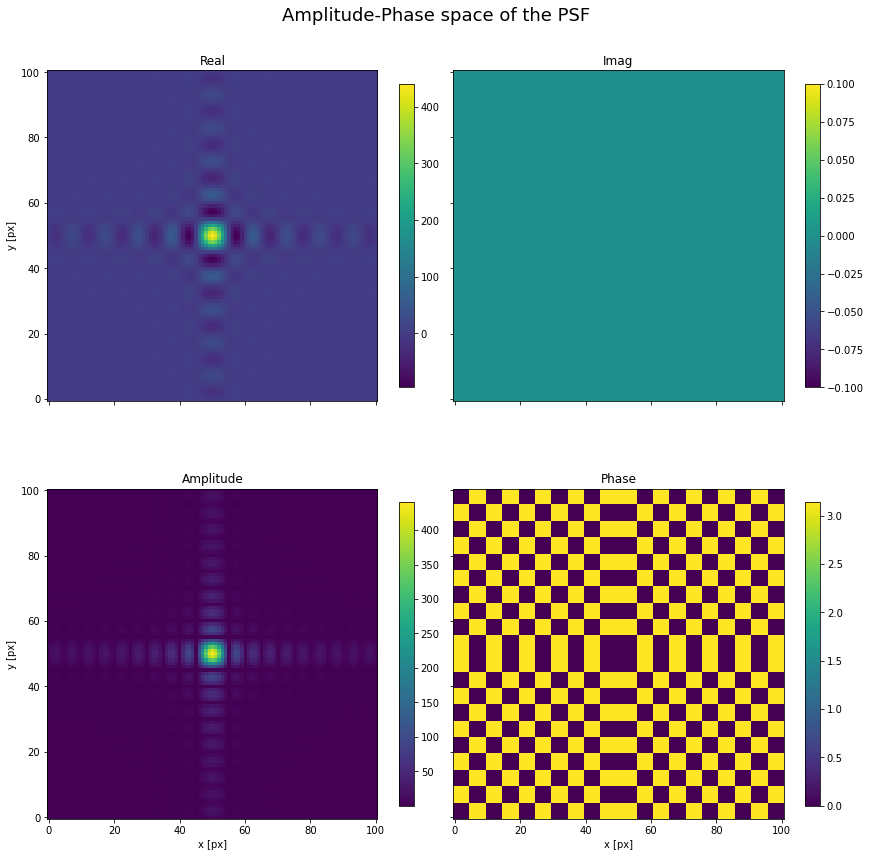

In [10]:
npix = 21

y,x = np.mgrid[:npix, :npix]

ampli = np.ones_like(y)
phase = np.zeros_like(y)  # zero phase across entire aperture

# make the complex amplitude E
E = ampli * np.exp(1j*phase)

# carry out the FT of E and add a spatial sampling of 5 by default
# recall: the functions FFT and displC where the functions defined in the beginning of this notebook
Edet = FFT(E,5)

# display the central part of Edet
displC(Edet)

The function `displC` plots out the complex image $E_{det}$ in two formats 
1. the Real ($a$) and Imaginary ($b$) components, and as 
2. the complex exponential notation with an Amplitude ($A$) and Phase ($\phi$).

### Intensity 

We can calculate the **intensity** as seen on a detector $I_{det}$ by calculating the modulus squared of the electric field on the detector:


$$I_{det} = \|E_{det}\|^2 = E_{det} \cdot \text{conj}(E_{det}) = \texttt{np.abs(E)} * \texttt{np.abs(E)}$$

<div class="alert alert-block alert-success">
<b>Example  2.4:</b> We want to determine the normalised intensity image from our resultant electric field at the detector, $E_{det}$, as calculated in the previous example. To do this we have to:
<ol>
    <li> take the absolute value squared of $E_{det}$, </li>
    <li> normalise it by the highest value in $I_{det}$ to determine the normalised intensity image. </li>
</ol>
</div>

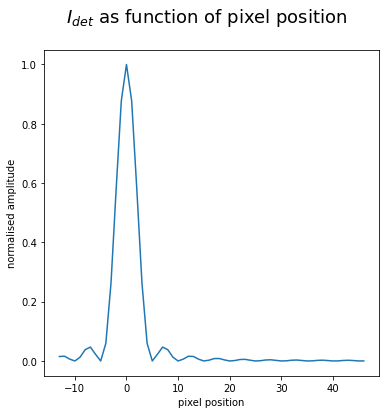

In [11]:
Edet_ampl = np.abs(Edet)

# determine intensity
Idet = Edet_ampl * Edet_ampl

# normalise to the brightest pixel
Idet = Idet / np.max(Idet)

# get central row in Edet and Idet
nx, ny = Edet_ampl.shape

yy, xx = np.mgrid[:nx,:ny]

xc = int((nx + 1)/2.)
yc = int((ny + 1)/2.)

# central pixel is at yy, xx = (0,0)
yy = yy - yc
xx = xx - xc

fig, ax = plt.subplots(1, figsize=(6,6))  

ax.plot(xx[xc,40:100],Idet[xc,40:100])

ax.set_xlabel('pixel position')                 
ax.set_ylabel('normalised amplitude')
fig.suptitle('$I_{det}$ as function of pixel position', fontsize=18) 
plt.show()

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.4</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

**Estimate the height of the first sidelobe in the normalised intensity image by adjusting the y scale of the plot using `axes.Axes.set_ylim()`. Label your x and y axes on the plot using `axes.Axes.set_xlabel()` and `axes.Axes.set_ylabel()`**

---

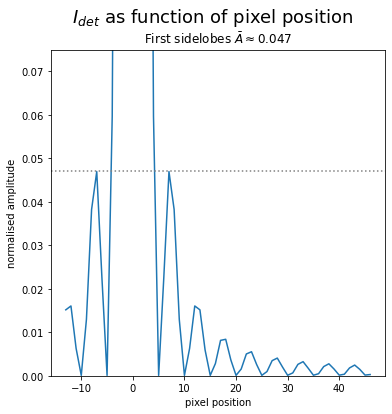

In [12]:
# Q4 answer here
fig, ax = plt.subplots(1, figsize=(6,6))  

ax.plot(xx[xc,40:100],Idet[xc,40:100])

ax.set_ylim(0, 0.075)
ax.axhline(0.047, color="gray", ls="dotted")

ax.set_xlabel('pixel position')                 
ax.set_ylabel('normalised amplitude') 
ax.set_title(r'First sidelobes $\bar{A}\approx0.047$') 
fig.suptitle('$I_{det}$ as function of pixel position', fontsize=18) 
plt.show()

# height is ca 0.047 (normalised)

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.5</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>


**Plot the same quantity as for question 1.3 but on a logarithm 10 scale.** 

**Answer question: Where are the first five minima located relative to the central peak (measured in pixels and estimated by visual inspection) from the central peak?**

---

<div class="alert alert-block alert-info">
<b>Tip:</b> "Google is your best friend, (do a Google search for the numpy function to get a logarithm)"
    
</div>

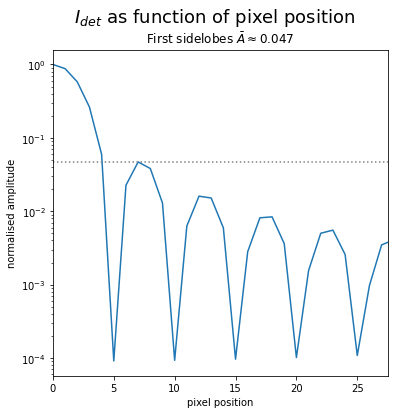

In [13]:
# Q5 answer here
fig, ax = plt.subplots(1, figsize=(6,6))  

ax.plot(xx[xc,40:100],Idet[xc,40:100])

ax.axhline(0.047, color="gray", ls="dotted")
ax.set_yscale('log')
ax.set_xlim(0, 27.5)

ax.set_xlabel('pixel position')                 
ax.set_ylabel('normalised amplitude') 
ax.set_title(r'First sidelobes $\bar{A}\approx0.047$') 
fig.suptitle('$I_{det}$ as function of pixel position', fontsize=18) 
plt.show()

# first 5 (positive x) minima are at 5, 10, 15, 20, 25 px or thereabouts (of course along negative x direction its the same)

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.6</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>


**Change the sampling factor (currently 5) in the `FFT(E,5)` function to different integers. What happens to the pixel locations of the minima?**

---

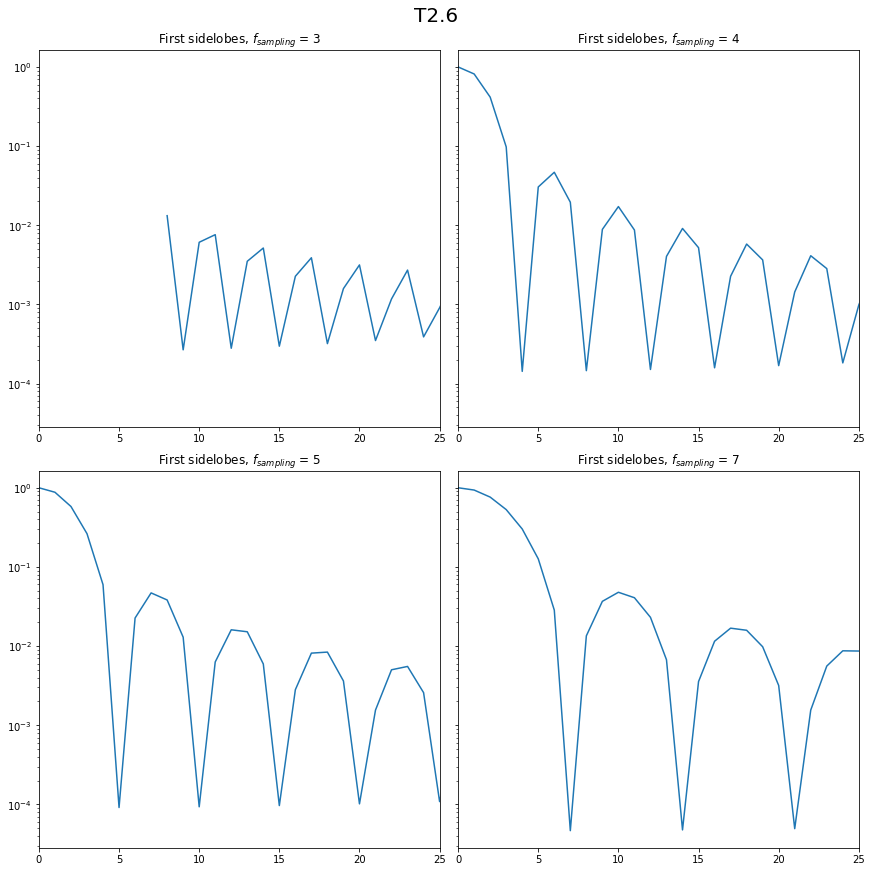

In [14]:
# Q6 answer here

fig, axes = plt.subplots(nrows=2, ncols=2,
                         constrained_layout=True,
                         # sharex=True,
                         sharey=True,
                         figsize=(12, 12))

sfs = np.linspace(3, 7, 4, dtype=int)
for i, (ax, sf) in enumerate(zip(axes.flatten(), sfs)):
    Edet = FFT(E, sf)
    Edet_ampl = np.abs(Edet)
    Idet = Edet_ampl * Edet_ampl
    Idet = Idet / np.max(Idet)
    nx, ny = Edet_ampl.shape
    yy, xx = np.mgrid[:nx,:ny]
    xc = int((nx + 1)/2.)
    yc = int((ny + 1)/2.)
    yy = yy - yc
    xx = xx - xc

    ax.plot(xx[xc,40:100],Idet[xc,40:100])
    ax.set_yscale('log')
    ax.set_xlim(0, 25)
    ax.set_title(r'First sidelobes, $f_{sampling}$ ='+f' {sf}') 

fig.suptitle(r'T2.6', fontsize=20)
plt.show() 

### ANSWER 2.6
The spacing between the minima increases proportionally to the pad value. No idea why though, but here is a guess:
What we are essentially doing is convoluting using a FFT:

code is: psfA = ifftshift(fft2(fftshift(padcplx(c,pad))))

so we first pad the ends of the image

then FFT shift the image

take the FFT of the shifted image

FFT shift it back to its original location


Since the FFT is the same as a circular cross-correlation (image wraps around at the boundaries), we need to add the padded zeros to model the real signal which is zeros outside the actual image. By padding with zeros we "remove" the overlap the image has with itself in the  circular cross-correlation. 

We want the FFT to be a linear and not a circular convolution in the frequency domain, so we have to pad with zeros! Otherwise we mix the results from the outer extents of the image. It also allows for a higher resolution in frequency space due to the binning that can be used.

So its only expected that we have minima at the padding with as this is where the signals from the image starts overlapping again. Padding an infinite amount of zeros would give the "desired" result, but of course this is not possible (unless we finally find a mthod to download more RAM).

I think thats at least the right direction, but FFTs are confusing :D

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.7</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>


**In the example we created a squared telescope pupil of 21 by 21 pixels. Now it is your turn to try a new telescope pupil - make a circular pupil with a diameter of 101 pixels, and calculate the PSF (equivalent to calculating $I_{det}$) and display it with `displC()`**

---

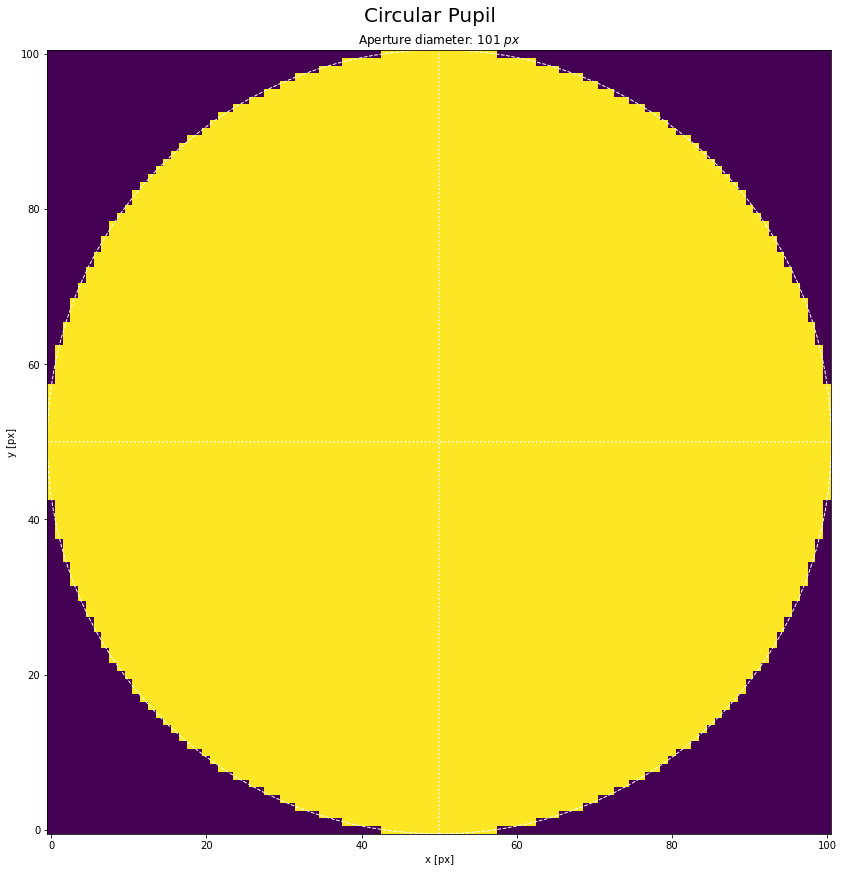

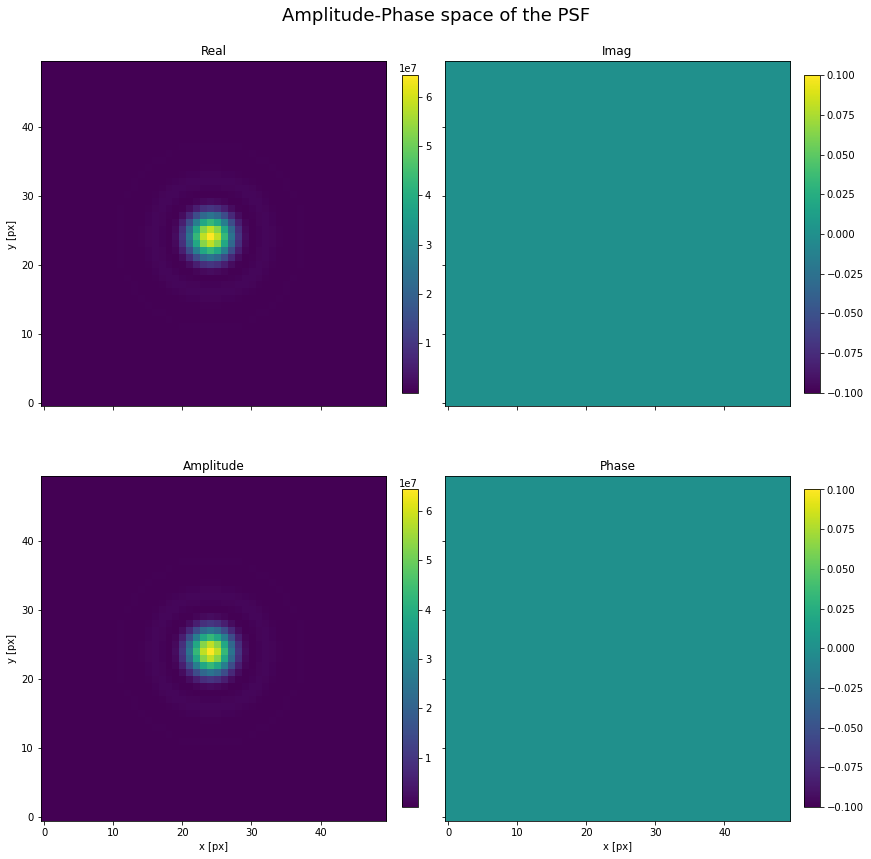

In [15]:
# Q7 answer here

# make a telescope pupil
# make x,y coords for making telescope pupil
# generate radial values mask r centered in middle of image

phase = np.zeros((101,101))

fig, ax = plt.subplots(nrows=1, ncols=1,
                         constrained_layout=True,
                         figsize=(12, 12))


ampli = circle_mask(phase, 50, 50, 101/2)
plt.imshow(ampli)

ax.axvline(50, c="w", ls="dotted")
ax.axhline(50, c="w", ls="dotted")

p = mpl.patches.Circle((50, 50), 101/2, fc="none", ec="w", ls="dashed")
ax.add_artist(p)

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(r'Aperture diameter: $101~px$') 
fig.suptitle(r'Circular Pupil', fontsize=20)
plt.show()

# =================
E = ampli * np.exp(1j*phase)
Edet = FFT(E, 5)
PSF = np.abs(Edet)*np.abs(Edet)
displC(PSF, trim=50)

# make the circular telescope pupil
# make PSF

# make and display the intensity image ( = A * conj(A) )


---
<span style="  font-size:2em; color: SteelBlue;">Question 2.8</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>


**Normalise the PSF of question 2.7 and use `displC` to display the log10 of the PSF. Plot the central row of pixels showing the peak of the PSF twice: once using linear and once using log10 units.**

---

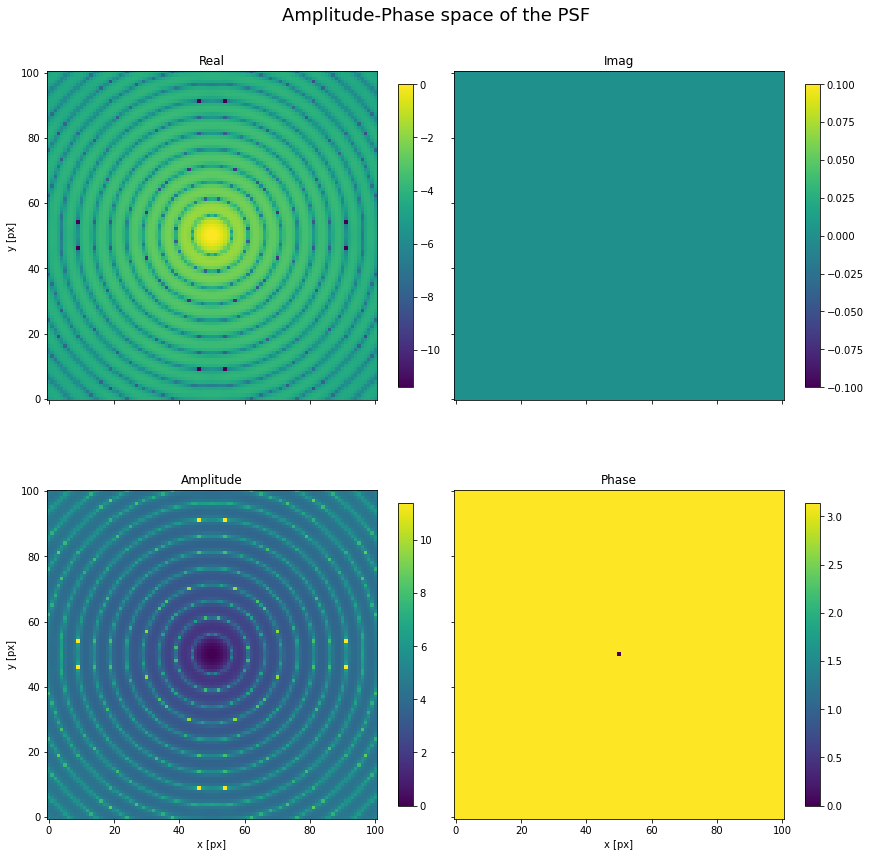

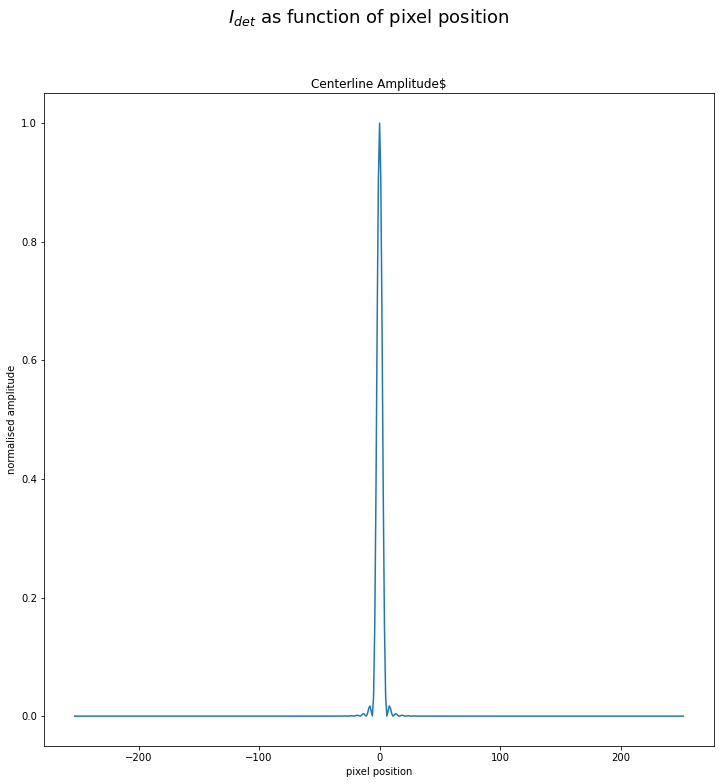

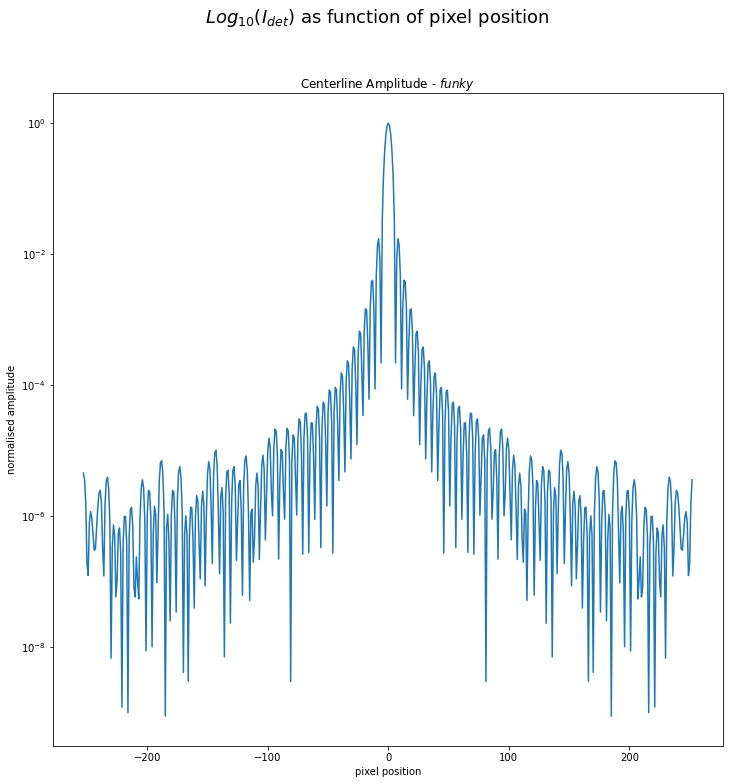

In [16]:
# Q8 answer here

# normalise to the peak value
# plot out the central line

PSF_norm = np.max(PSF)
PSF_norm = PSF / PSF_norm

PSF_norm_log = np.log10(PSF_norm)

displC(PSF_norm_log)

# ==============================
# amplitude cross section is the same for cutting through center row or column

Edet_ampl = np.abs(Edet)
# determine intensity
Idet = Edet_ampl * Edet_ampl
# normalise to the brightest pixel
Idet = Idet / np.max(Idet)
# get central row in Edet and Idet
nx, ny = Edet_ampl.shape
yy, xx = np.mgrid[:nx,:ny]
xc = int((nx + 1)/2.)
yc = int((ny + 1)/2.)
# central pixel is at yy, xx = (0,0)
yy = yy - yc
xx = xx - xc

fig, ax = plt.subplots(1, figsize=(12,12))  

ax.plot(xx[xc,:],Idet[xc,:])

# ax.set_ylim(0, 0.075)
# ax.axhline(0.047, color="gray", ls="dotted")

ax.set_xlabel('pixel position')                 
ax.set_ylabel('normalised amplitude') 
ax.set_title(r'Centerline Amplitude$') 
fig.suptitle(r'$I_{det}$ as function of pixel position', fontsize=18) 
plt.show()

# ==============================

fig, ax = plt.subplots(1, figsize=(12,12))  

ax.plot(xx[xc,:],Idet[xc,:])

# ax.set_ylim(0, 0.075)
# ax.axhline(0.047, color="gray", ls="dotted")

ax.set_yscale('log')
ax.set_xlabel('pixel position')                 
ax.set_ylabel('normalised amplitude') 
ax.set_title(r'Centerline Amplitude - $funky$') 
fig.suptitle(r'$Log_{10}(I_{det})$ as function of pixel position', fontsize=18) 
plt.show()

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.9</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

**Where is (approximately) the first minimum measured from the primary peak of the PSF? Give your answer in units of pixels**

---

Mean Error: 3.90e-10.
x-scale: 0.63
y-scale: 1.00


C:\Users\COSMOS2\AppData\Local\Temp/ipykernel_9864/1561988932.py:20: RuntimeWarning: invalid value encountered in true_divide
  return jn(1, x) / x


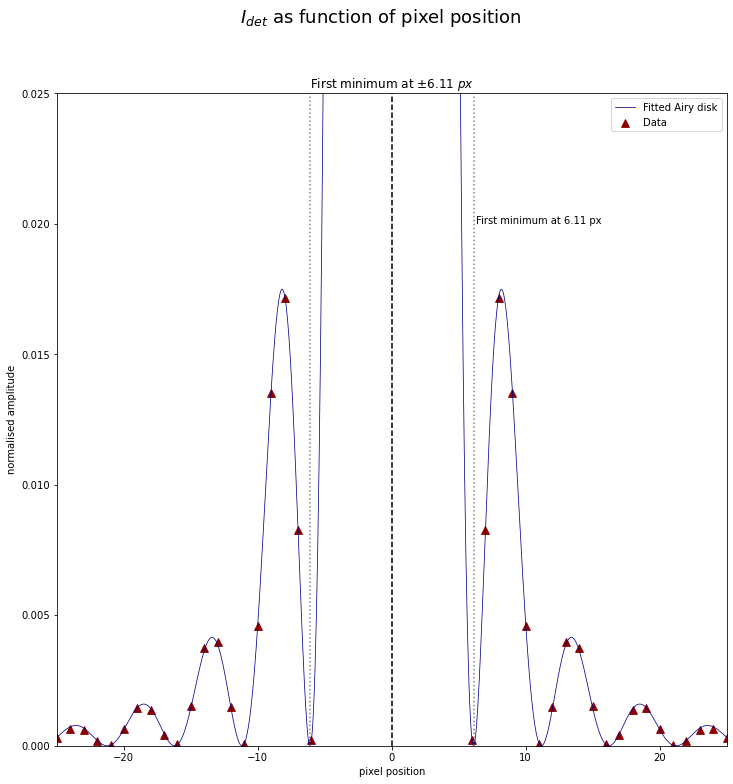

In [17]:
# Q9 answer here

fig, ax = plt.subplots(1, figsize=(12,12))  

data = np.vstack((xx[xc,:],Idet[xc,:]))
ax.scatter(xx[xc,:],Idet[xc,:], label="Data", marker="^", c="darkred", s=60)

ax.set_ylim(0, 0.025)
ax.set_xlim(-25, 25)
ax.axhline(0.047, color="gray", ls="dotted")
ax.axvline(0, color="k", ls="dashed")


# this is not really neded but I wanted to try it
try:
    try:
        from scipy.special import jn, jn_zeros
        from scipy.optimize import minimize, brute
        def jinc(x):
            return jn(1, x) / x

        def airy(x):
            return (2 * jinc(x))**2

        def fitted_airy(x, sx, sy):
            return sy * airy(x*sx)

        def residual(s, data):
            return np.mean(np.ma.masked_invalid(np.square(data[1] - fitted_airy(data[0], *s)))/1)

        std_airy = np.vstack((xx[xc,:], airy(xx[xc,:])))

        bnds = ((0., None), (0., None))
        args = data
        # minimize the function with the given bounds
        res = minimize(residual, x0=np.array([1., 1.]),
                       args=args, method='SLSQP', bounds=bnds,
                       tol=1e-10,
                       options={'disp': False})
        print(f"Mean Error: {residual(res.x, data):.2e}.")
        print(f"x-scale: {res.x[0]:.2f}\n"
              f"y-scale: {res.x[1]:.2f}")

        x = np.linspace(-25, 25, 1000)
        ax.plot(x, fitted_airy(x, *res.x), label="Fitted Airy disk", c="darkblue", linewidth=0.75)
        
        
        def sol_fitted_airy(x):
            return res.x[1] * airy(x*res.x[0])
        
        
        min1 = brute(sol_fitted_airy, ranges=[(2.5, 7.5)])[0]
        
        
        
    except (NameError, ImportError, ModuleNotFoundError):
        print("So something/somebody is actually checking if we have any additional imports.\n"\
              "I wonder if you just run these on a dedicated virtual environment where you only include the allowed packages.")
        print("In any case I use above ode to find the actual functions but you can just read the minimum from the data.\n"\
              "Its also not difficult to do the same using np.linalg.lstsq but its a little morw work and I dont like matrices in the morning.")
        x = np.linspace(-25, 25, 1000)
        ax.plot(x, np.interp(x, *data), label="Interpolated Airy disk", c="darkblue", linewidth=0.75)
        pass
except BaseException:
    # just making sure that no matter what cursed environment you guys have this will still run
    pass

# safety
min1 = 6.107285348992599

ax.axvline(min1, color="gray", ls="dotted")
ax.axvline(-min1, color="gray", ls="dotted")
ax.text(min1+0.2, 0.02, f"First minimum at {min1:.2f} px", ha="left")


ax.legend()
ax.set_xlabel('pixel position')                 
ax.set_ylabel('normalised amplitude') 
ax.set_title(r'First minimum at $\pm$'+f'{min1:.2f}'+r'$ ~px$') 
fig.suptitle(r'$I_{det}$ as function of pixel position', fontsize=18) 
plt.show()

## Adding a tilt in the phase across the telescope pupil

The final exercise is modelling a tilted wavefront that is incident on the lens. We do this by adding a 'ramp' in the x-direction. This ramp goes from $-3\pi$ to $+3\pi$ across the telescope pupil. 

You can use `mgrid` to get an x and y grid of points which will also be unnormalised ramps in both x and y. To center the ramp you subtract the middle x value of each x value to obtain a value of 0 in the middle of the x array. Thereafter you normalise the ramp to obtain the correct amplitude.

---
<span style="  font-size:2em; color: SteelBlue;">Question 2.10</span> <span style="  font-size:1em; color: SteelBlue;">
(4 points): </span>


**Display the PSF. What has happened to the position of the PSF? By how far has it moved? Experiment with different multiples of $\pi$ for the ramp.**

---

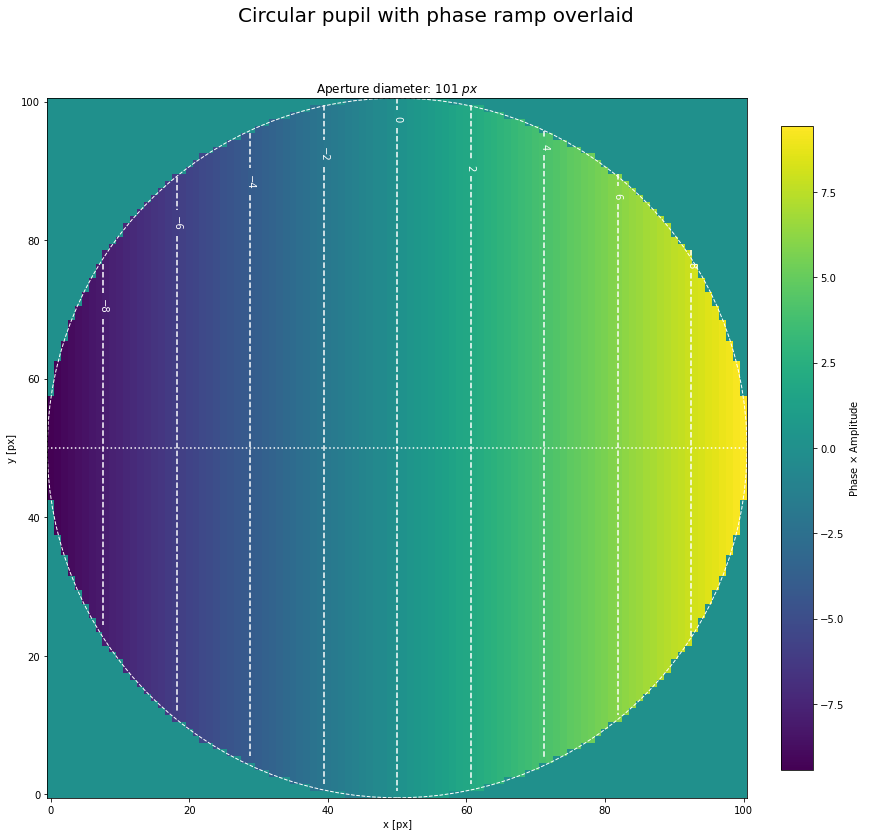

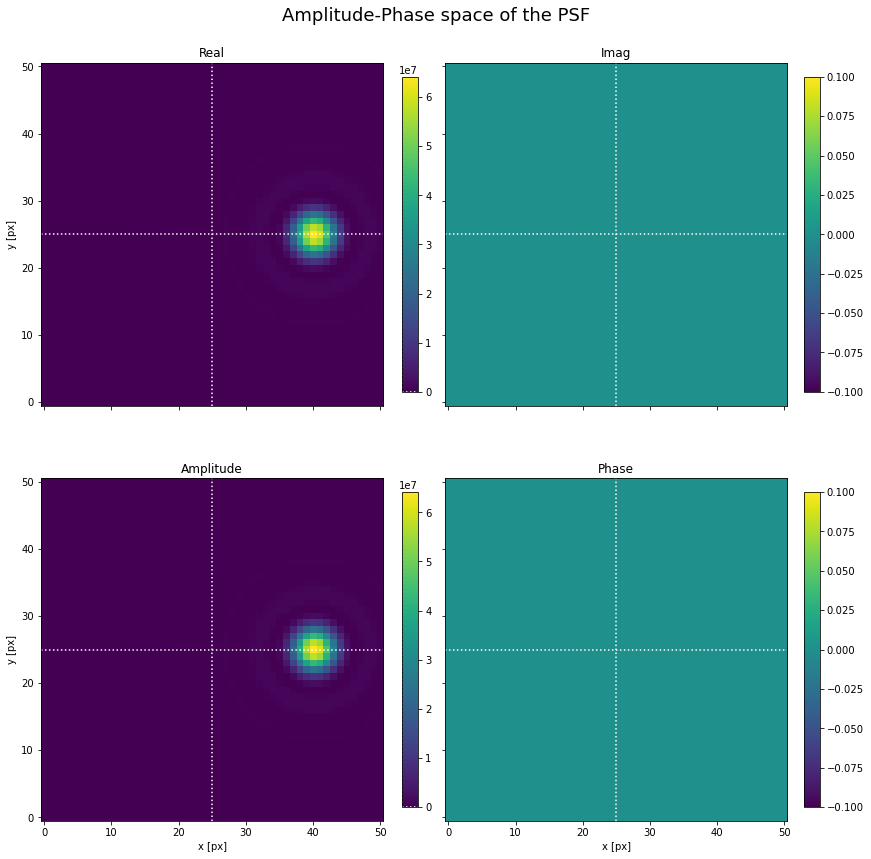

In [18]:
# Q10 answer here

phase = np.zeros((101,101))
ampli = circle_mask(phase, 50, 50, 101/2)

# adding a phase ramp

slope = 3  # 10/np.pi
r, steps = np.linspace(-slope * np.pi, slope * np.pi, ampli.shape[0], retstep=True)
# diff_because_plt_contour_has_horrible_functionality_like_seriously_pls_fix = steps
# print(ramp[50])
ramp = np.tile(r, reps=(ampli.shape[1], 1))

fig, ax = plt.subplots(nrows=1, ncols=1,
                         constrained_layout=True,
                         figsize=(12, 12))
im = plt.imshow(ampli* ramp,
               )
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label=r"Phase $\times$ Amplitude")

c1 = ax.contour(np.ma.masked_array(ampli* ramp + steps/2, mask=ampli==False), levels=11,
                corner_mask=True,
                colors="w", origin="lower",
                linestyles="dashed")
ax.clabel(c1, fontsize=10, inline=True, colors='w')

# print(ampli.min()-1, ampli.max()-1)

# ax.axvline(50, c="w", ls="dotted")
ax.axhline(50, c="w", ls="dotted")
p = mpl.patches.Circle((50, 50), 101/2, fc="none", ec="w", ls="dashed")
ax.add_artist(p)
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_title(r'Aperture diameter: $101~px$') 
fig.suptitle(r'Circular pupil with phase ramp overlaid', fontsize=20)
plt.show()


# get the size of the telescope pupil and make an X-ramp or use the one from mgrid
# ramp from mulpiples of pi

E = ampli * np.exp(1j*ramp)
Edet = FFT(E, 5)
PSF = np.abs(Edet)*np.abs(Edet)
displC(PSF, trim=51, show=False)

fig = plt.gcf()
axes = np.array(fig.axes).flatten()
for ax in axes:
    ax.axhline(25, c="w", ls="dotted")
    ax.axvline(25, c="w", ls="dotted")
    
plt.show()

## Answer 2.10

The PSF shifts by pi * n pixels in positive x-direction, where n is the slope of the ramp as defined above.
However, this shift is furthermore scaled by the padding length for the FFT. I dont know what the transfer function there is but it sure isnt linear (at least thats what it looks like when playing around with the pad). The first part is expected since our (imaginary) detector cuts the incident wavefronts by the ramp plane. The second part (due to the pad) does kinda make sense since the shifting we do to get the FFT right isnt centered on the right values anymore. At least thats what makes most sense to me. Thinking about it again in terms of circular convelutions it makes sense that a discontinuity/ramp like the one we introduce where offsets the whole process.

---
<span style="  font-size:2em; color: SteelBlue;">Your time has a value as well</span> 
 </span>

---

### How long did this Practicum take?
Please enter the number of hours you spent on this Practicum (including the time spend besides the time spend during the Lecture) below:

In [19]:
# number of hours taken here
#
# probably like 4-6ish? It was not very long but it was very confusing. 
# I get that we should understand FFTs quite well at this point but I really havent used them on images before 
# so it would have been nice to get an introduction to them (probably 5 min is enough, just to get a feel for it)
# otherwise this was cool, now I am excited how we will use them!
# Also, one more thing, Q2.6, what is actually the meaning behind the minima and maxima? 
# I am still not sure I got this right, but it seems like its some self-convolution of the image? 
# Is that correct to say? So does this tend to become more and more gaussian for larger numbers of diemsions?
# Math is hard...